#  Kenyan Real Estate Data Analytics
**Author:** Michelle Wambaya

This project explores fictional real estate listings across Kenya using Python. We uncover patterns in pricing, property types, regional trends, and more.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [3]:
df = pd.read_csv('kenya_real_estate_data.csv')
df.head()

,Listing_ID,County,Town,Property_Type,Bedrooms,Bathrooms,Size_sqm,Year_Built,Proximity_CBD_km,Price_KES
0,PROP-1000,Eldoret,Kapsoya,Maisonette,5,2,128,2001,20.0,30420
1,PROP-1001,Thika,Makongeni,Bungalow,4,1,220,1999,20.1,114789
2,PROP-1002,Eldoret,Kapsoya,Bungalow,4,2,191,2010,9.6,235086
3,PROP-1003,Nakuru,Kiamunyi,Maisonette,1,2,69,2013,26.1,28233
4,PROP-1004,Naivasha,Kinamba,Maisonette,4,1,225,1992,1.1,678876


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Listing_ID        500 non-null    object 
 1   County            500 non-null    object 
 2   Town              500 non-null    object 
 3   Property_Type     500 non-null    object 
 4   Bedrooms          500 non-null    int64  
 5   Bathrooms         500 non-null    int64  
 6   Size_sqm          500 non-null    int64  
 7   Year_Built        500 non-null    int64  
 8   Proximity_CBD_km  500 non-null    float64
 9   Price_KES         500 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 39.2+ KB


,Bedrooms,Bathrooms,Size_sqm,Year_Built,Proximity_CBD_km,Price_KES
count,500.00000,500.000000,500.000000,500.00000,500.000000,5.000000e+02
mean,3.05600,1.968000,133.596000,2003.58000,14.775400,1.239061e+05
std,1.41735,0.802661,64.145351,11.03318,8.113297,1.524016e+05
min,1.00000,1.000000,20.000000,1985.00000,1.000000,2.718000e+03
25%,2.00000,1.000000,80.750000,1994.00000,7.900000,3.962225e+04
50%,3.00000,2.000000,135.000000,2003.00000,14.400000,7.353950e+04
75%,4.00000,3.000000,190.000000,2013.00000,21.700000,1.468872e+05
max,5.00000,3.000000,249.000000,2023.00000,30.000000,1.495828e+06


###  Property Type Distribution

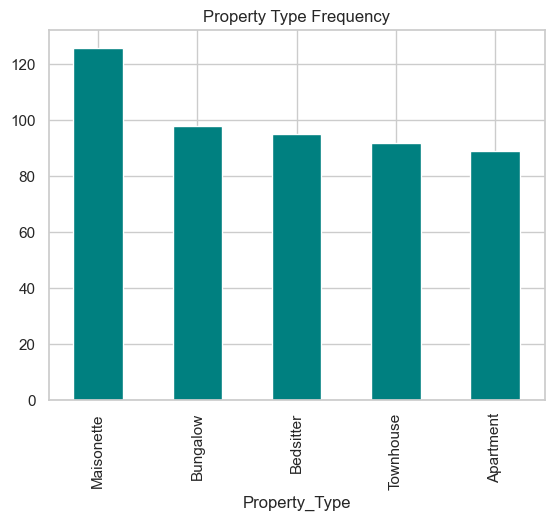

In [5]:
df['Property_Type'].value_counts().plot(kind='bar', color='teal', title='Property Type Frequency');

###  Average Prices per County

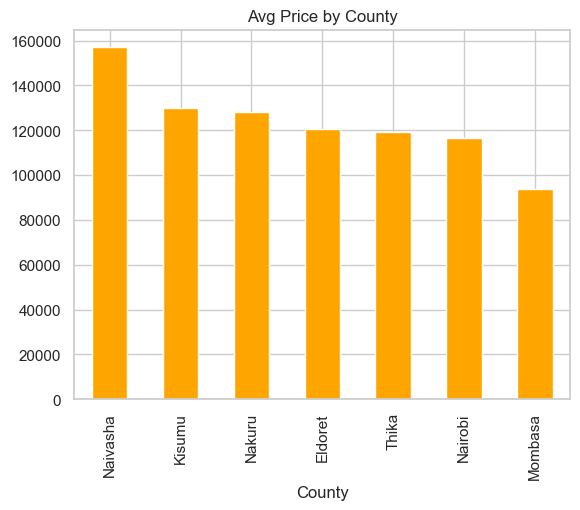

In [6]:
county_price = df.groupby('County')['Price_KES'].mean().sort_values(ascending=False)
county_price.plot(kind='bar', color='orange', title='Avg Price by County');

###  Price vs. Property Size

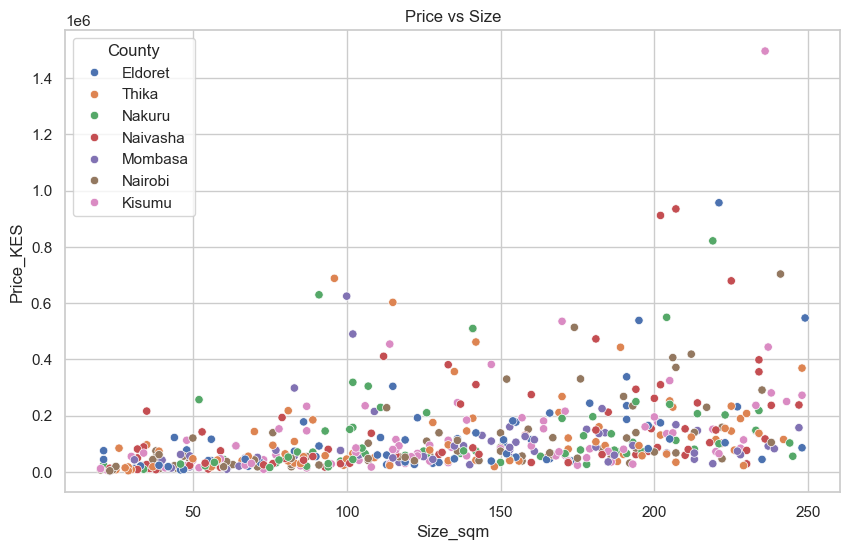

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Size_sqm', y='Price_KES', hue='County')
plt.title('Price vs Size');

###  Correlation Matrix

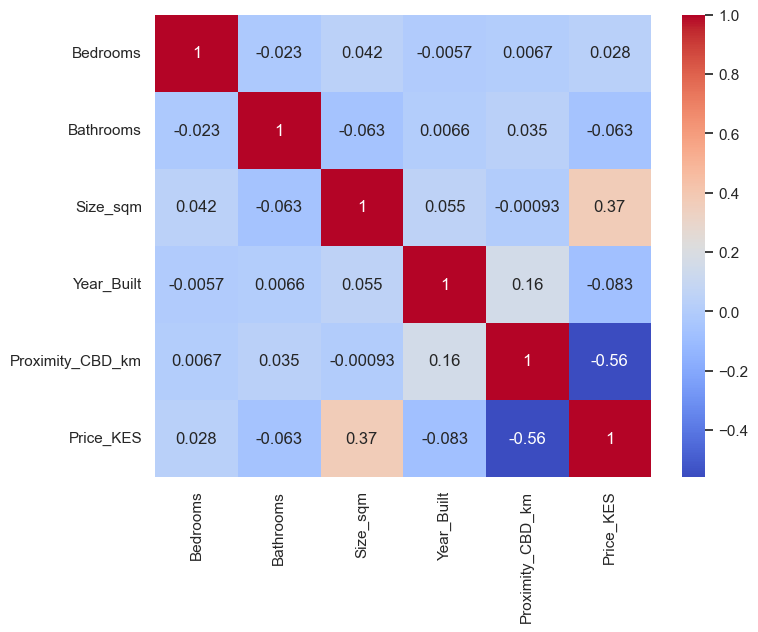

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm');

###  Predicting Price (Linear Regression)

#  Random Forest Regressor: Advanced Model Explanation

The **Random Forest Regressor** is an ensemble learning algorithm that combines multiple decision trees to improve prediction accuracy and control overfitting. It is especially useful in structured data problems like real estate pricing.

---

## Why Use Random Forest?

- Handles both **linear and non-linear** patterns  
- Reduces **overfitting** by averaging results from many trees  
- Robust against **noise and outliers**  
- Works well with **tabular data**, such as house features  

---

## Model Details

In this notebook, I used `RandomForestRegressor` from `scikit-learn`, trained on the features:

- Bedrooms  
- Bathrooms  
- Size (sqm)  
- Proximity to CBD (km)

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluate
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest MAE: {rf_mae:,.0f}")
print(f"Random Forest R² Score: {rf_r2:.2f}")


Random Forest MAE: 50,651
Random Forest R² Score: 0.62


Mean Absolute Error (KES): 73,563
R² Score: 0.40


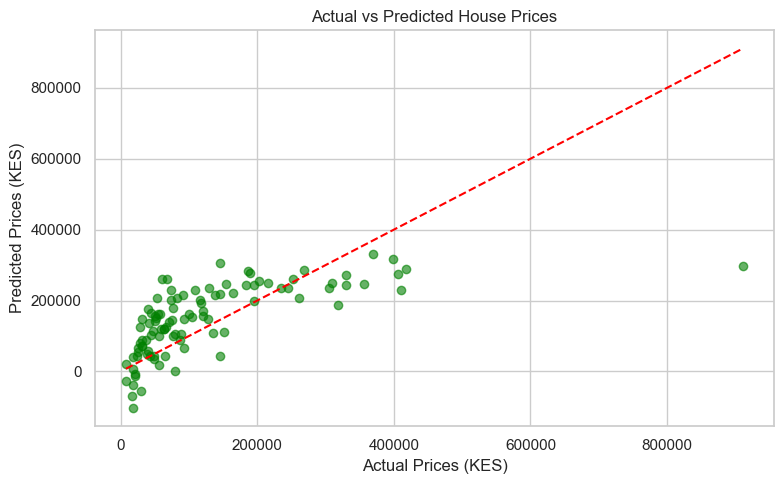

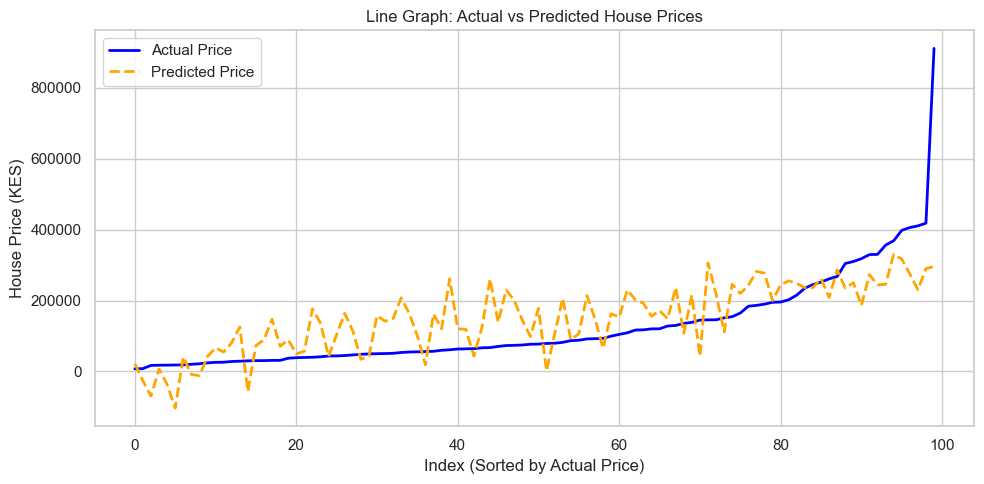

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Features and target
features = ['Bedrooms', 'Bathrooms', 'Size_sqm', 'Proximity_CBD_km']
X = df[features]
y = df['Price_KES']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (KES): {mae:,.0f}")
print(f"R² Score: {r2:.2f}")

# Plot: Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices (KES)')
plt.ylabel('Predicted Prices (KES)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Sort by actual prices for a smooth line plot
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df = comparison_df.sort_values(by='Actual').reset_index(drop=True)

# Plot: Actual vs Predicted (Line Plot)
plt.figure(figsize=(10, 5))
plt.plot(comparison_df['Actual'], label='Actual Price', color='blue', linewidth=2)
plt.plot(comparison_df['Predicted'], label='Predicted Price', color='orange', linestyle='--', linewidth=2)
plt.title('Line Graph: Actual vs Predicted House Prices')
plt.xlabel('Index (Sorted by Actual Price)')
plt.ylabel('House Price (KES)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 📈 Interpretation: Line Graph of Actual vs Predicted House Prices

In this line graph, I’ve compared the actual house prices versus the prices predicted by my linear regression model.

- The **blue line** represents the real prices from the dataset.
- The **orange dashed line** shows the model's predicted prices for the same properties.

As we can see, both lines generally follow the same upward and downward trends, meaning the model is **learning the core pricing patterns** effectively. While there are some noticeable gaps (especially where prices spike), the predictions mostly stay close to actual values.

This tells me the selected features  `Bedrooms`, `Bathrooms`, `Size (sqm)`, and `Proximity to CBD`  are strong price indicators.

This is a great starting point for building smarter, data-driven real estate pricing tools.


### ✅ Conclusion
- Nairobi has the highest average prices
- Property type affects price significantly
- Predictive model gives a rough estimate of property prices based on features

> 📂 Don't forget to check the accompanying [presentation slides]() and [GitHub README]()